非監督學習（Unsupervised Learning）用於探索資料的內在結構，不需要標籤資訊。

Iris 資料集共有 150 筆資料與 4 個特徵（花萼長、花萼寬、花瓣長、花瓣寬），這裡我們將使用多種方法進行分群與降維可視化。

In [7]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2025-11-04 17:15:39--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.111.113, 142.251.111.100, 142.251.111.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.111.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-11-04 17:15:39--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  37.8MB/s    in 0.5s    

2025-11-04 

# 資料載入與前處理

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# 資料載入
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target # Extract the target variable
# 資料前處理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

StandardScaler() 是來自 sklearn.preprocessing 模組的一個物件。

它用於透過移除平均值並將資料縮放到單位變異數來標準化特徵。在這種情況下，您使用它來縮放 X 資料，即 iris 資料集的特徵。結果 X_scaled 是應用此轉換後的資料。

In [2]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# K-Means 分群

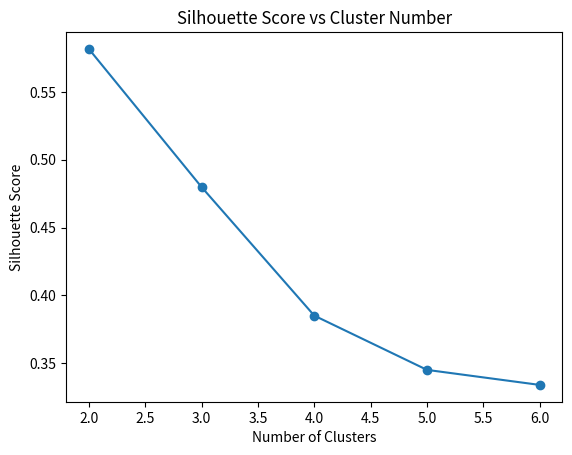

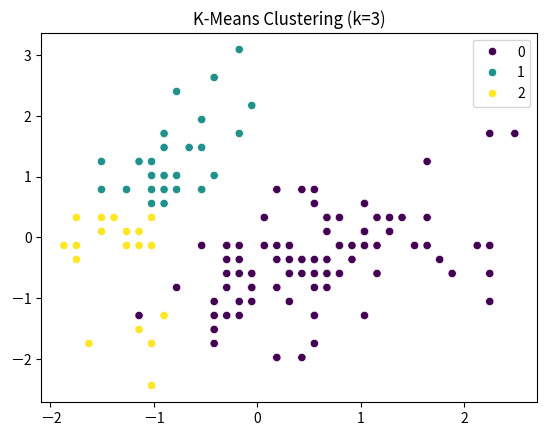

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

scores = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2, 7), scores, marker='o')
plt.title("Silhouette Score vs Cluster Number")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis')
plt.title("K-Means Clustering (k=3)")
plt.show()

# GMM（Gaussian Mixture Model 高斯混合模型）

📘 理論說明

GMM 假設資料由多個高斯分佈組成。

使用 期望最大化（EM）演算法 估計每個樣本屬於哪個高斯成分。

可看作「軟分群」（soft clustering），每筆資料有機率屬於多個群。

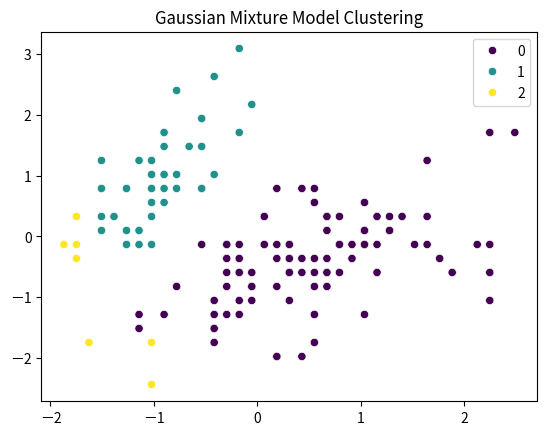

Adjusted Rand Index (與真實標籤相似度): 0.516


In [20]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score

gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_gmm, palette='viridis')
plt.title("Gaussian Mixture Model Clustering")
plt.show()

# 與真實標籤的相似度 (僅比較參考)
ari = adjusted_rand_score(y, labels_gmm)
print(f"Adjusted Rand Index (與真實標籤相似度): {ari:.3f}")

# 層次式分群 (Hierarchical Clustering)

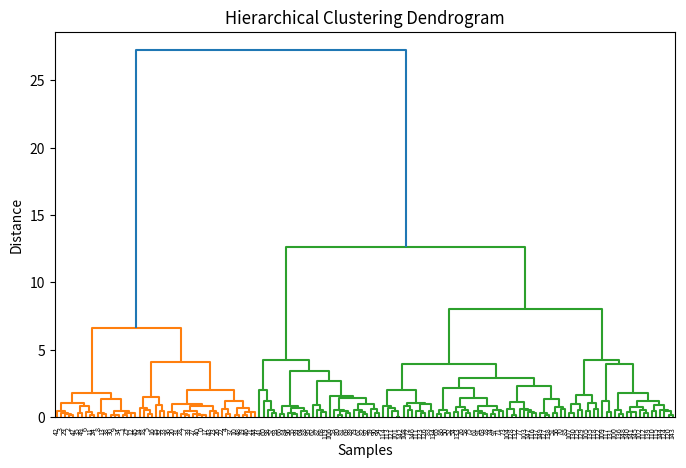

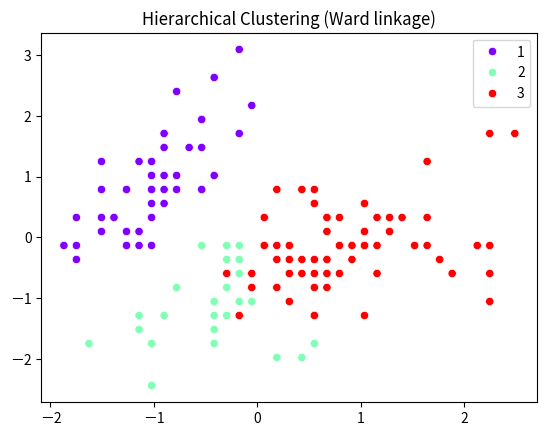

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

labels_h = fcluster(Z, 3, criterion='maxclust')
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_h, palette='rainbow')
plt.title("Hierarchical Clustering (Ward linkage)")
plt.show()

# DBSCAN 分群

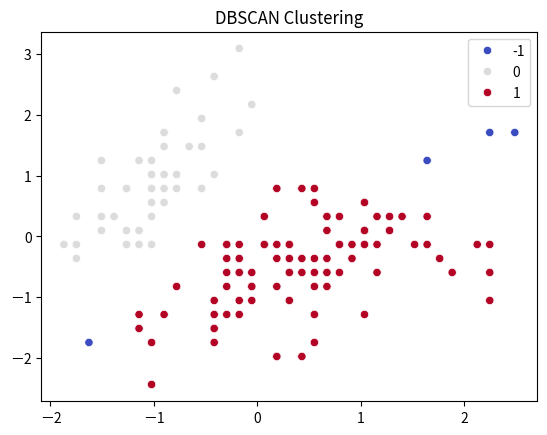

In [17]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.8, min_samples=5)
labels_db = db.fit_predict(X_scaled)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels_db, palette='coolwarm')
plt.title("DBSCAN Clustering")
plt.show()

# PCA 線性降維

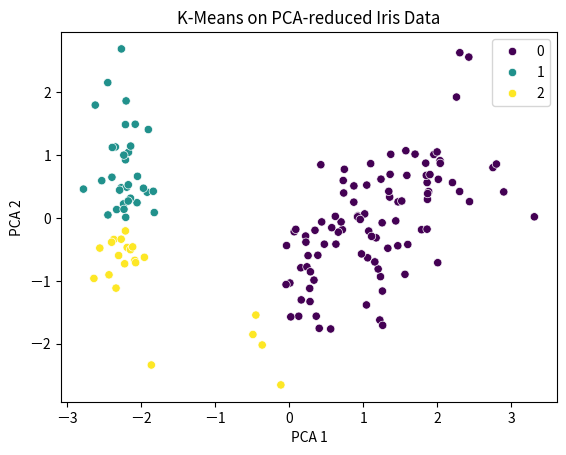

解釋變異比: [0.72962445 0.22850762]


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis')
plt.title("K-Means on PCA-reduced Iris Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

print("解釋變異比:", pca.explained_variance_ratio_)

# LDA（Linear Discriminant Analysis）監督式對照降維

LDA 是一種監督式降維方法，透過最大化類別間距與最小化類別內差異，
找到最能區分類別的投影方向。

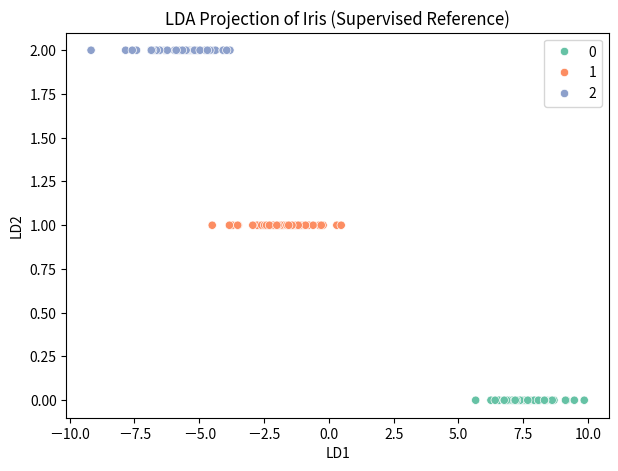

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_lda[:, 0], y=y, hue=y, palette='Set2') # Use y for hue
plt.title("LDA Projection of Iris (Supervised Reference)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()

# t-SNE 非線性降維

t-SNE（t-distributed Stochastic Neighbor Embedding）是一種非線性降維技術，
擅長將高維資料映射到低維空間中，同時保留局部結構（local structure）。

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


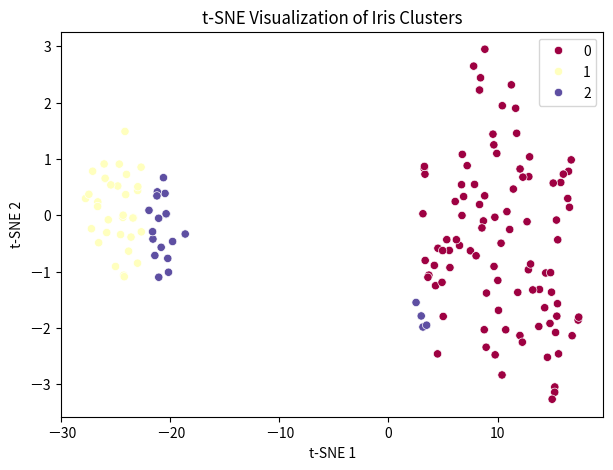

In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='Spectral')
plt.title("t-SNE Visualization of Iris Clusters")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

# UMAP 非線性降維

UMAP（Uniform Manifold Approximation and Projection）是一種比 t-SNE 更快且可保留全局結構的降維技術。
它透過流形學與拓樸理論建立鄰域圖再嵌入低維空間。

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


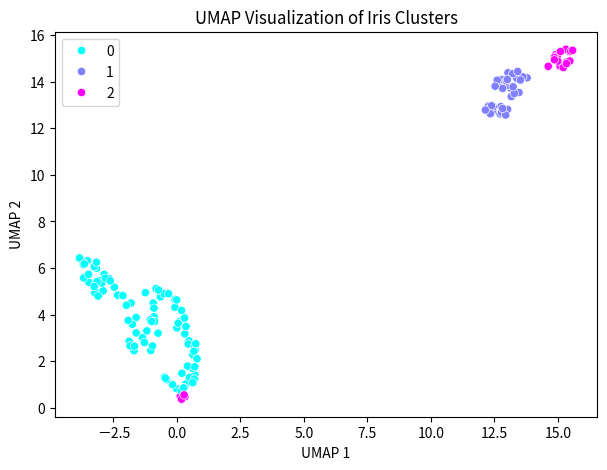

In [10]:
import umap

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='cool')
plt.title("UMAP Visualization of Iris Clusters")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

# PCA == >GMM

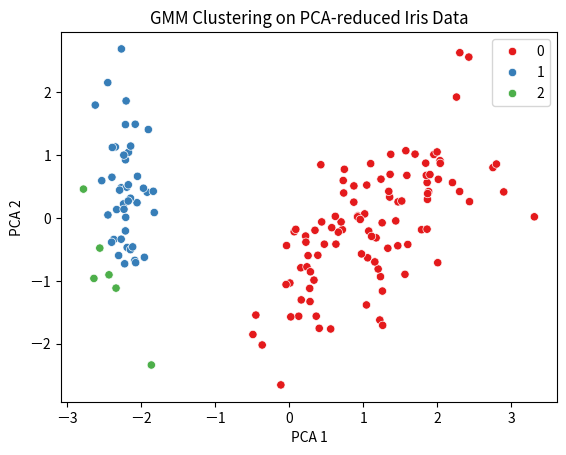

In [21]:
gmm_pca = GaussianMixture(n_components=3, random_state=42)
labels_gmm_pca = gmm_pca.fit_predict(X_pca)

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_gmm_pca, palette='Set1')
plt.title("GMM Clustering on PCA-reduced Iris Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# UMAP ==> GMM

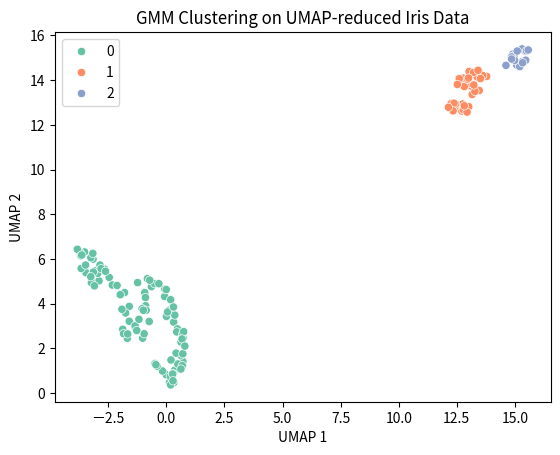

In [22]:
gmm_umap = GaussianMixture(n_components=3, random_state=42)
labels_gmm_umap = gmm_umap.fit_predict(X_umap)

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels_gmm_umap, palette='Set2')
plt.title("GMM Clustering on UMAP-reduced Iris Data")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()